# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
# Analisis Perkenalan Dataset
#
# Sumber dataset dari Kaggle
# Link: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection
#
# Dataset yang akan dianalisis memiliki karakteristik berikut:
#
# 1. Tanpa Label atau Kelas
#    - Tidak ada kolom yang secara eksplisit menyatakan kelas atau label target.
#
# 2. Jumlah Baris
#    - Dataset memiliki 2.512 baris, sehingga memenuhi syarat jumlah data minimal 1.000 baris.
#
# 3. Tipe Data
#    - Data Numerikal:
#        - TransactionAmount (Jumlah transaksi)
#        - CustomerAge (Usia pelanggan)
#        - TransactionDuration (Durasi transaksi)
#        - LoginAttempts (Jumlah percobaan login)
#        - AccountBalance (Saldo akun)
#
#    - Data Kategorikal:
#        - TransactionType (Debit/Kredit)
#        - Location (Lokasi transaksi)
#        - DeviceID (ID perangkat)
#        - MerchantID (ID pedagang)
#        - Channel (Metode transaksi seperti ATM, Online)
#        - CustomerOccupation (Pekerjaan pelanggan)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Import library yang diperlukan
import pandas as pd  # Mengimpor pustaka Pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka Matplotlib untuk membuat visualisasi grafis
import numpy as np  # Mengimpor pustaka NumPy untuk komputasi numerik yang efisien
import seaborn as sns  # Mengimpor pustaka Seaborn untuk visualisasi data yang estetis dan informatif
import plotly as py  # Mengimpor pustaka Plotly untuk membuat visualisasi data yang interaktif

from sklearn.feature_selection import VarianceThreshold  # Mengimpor VarianceThreshold untuk seleksi fitur berdasarkan nilai variansnya
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk menentukan jumlah optimal kluster menggunakan metode Elbow
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler  # Mengimpor teknik praproses data seperti encoding label, normalisasi, dan standardisasi
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans untuk melakukan clustering pada data
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi kualitas clustering
from sklearn.decomposition import PCA  # Mengimpor algoritma PCA (Principal Component Analysis) untuk reduksi dimensi data
from sklearn.preprocessing import OneHotEncoder  # Mengimpor OneHotEncoder untuk mengubah data kategorikal menjadi bentuk yang dapat digunakan untuk analisis
from sklearn.cluster import AgglomerativeClustering  # Mengimpor AgglomerativeClustering untuk melakukan clustering dengan pendekatan hierarkis

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# Memuat dataset dari URL ke dalam DataFrame menggunakan fungsi read_csv
df = pd.read_csv('https://raw.githubusercontent.com/agstronna/Analisis-Bank_Transaction/main/Dataset_clustering_bank_transactions_data_2.csv')

# Menampilkan 10 baris pertama dari dataset
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51,Engineer,86,1,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55,Doctor,120,1,1021.88,2024-11-04 08:06:32


In [4]:
# Membuat salinan dataset untuk memastikan data asli tidak terpengaruh oleh manipulasi
dataset = df.copy()

# Mengecek tipe dari variabel 'dataset' untuk memastikan bahwa itu adalah DataFrame Pandas
print(type(dataset))  # Output harus menunjukkan <class 'pandas.core.frame.DataFrame'>

# Menampilkan beberapa baris awal dari dataset untuk mendapatkan gambaran struktur dan isi data
dataset.head()

<class 'pandas.core.frame.DataFrame'>


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**1. Memahami Struktur Data**

- Dataset terdiri dari **2.512 baris** dan **16 kolom**, yang merepresentasikan jumlah transaksi dan atribut yang tersedia.
- Tipe data meliputi:
  - **Numerikal** (5 kolom): `TransactionAmount`, `CustomerAge`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`.
  - **Kategorikal** (11 kolom): `TransactionType`, `Location`, `DeviceID`, `MerchantID`, `Channel`, `CustomerOccupation`, dll.

In [5]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, nama kolom, jumlah nilai non-null, dan tipe data setiap kolom
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
# Menampilkan ringkasan statistik deskriptif dari dataset
dataset.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


**2. Menangani Data yang Hilang**

In [7]:
# Mengecek jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset
dataset.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


**3. Analisis Distribusi dan Korelasi**

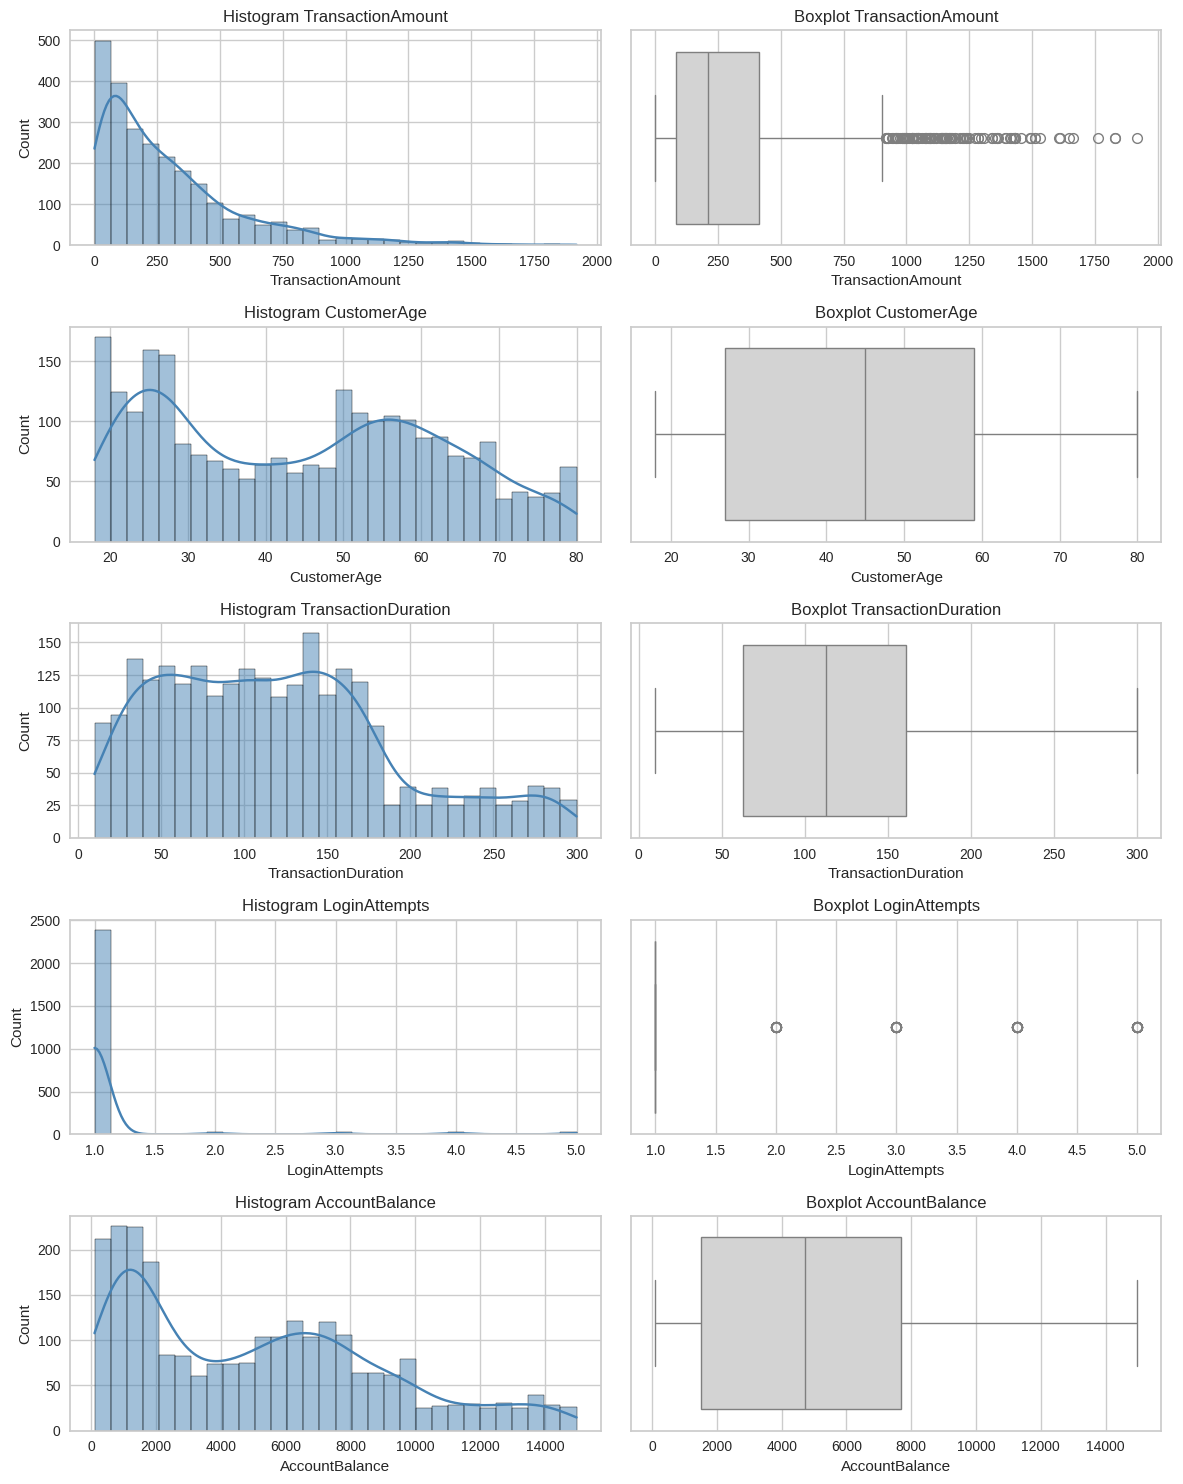


Matriks Korelasi:
                      TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


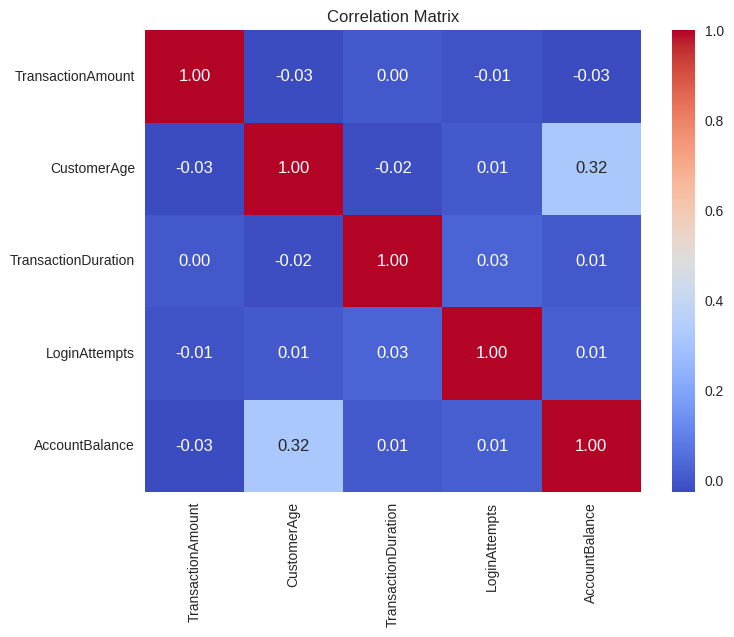

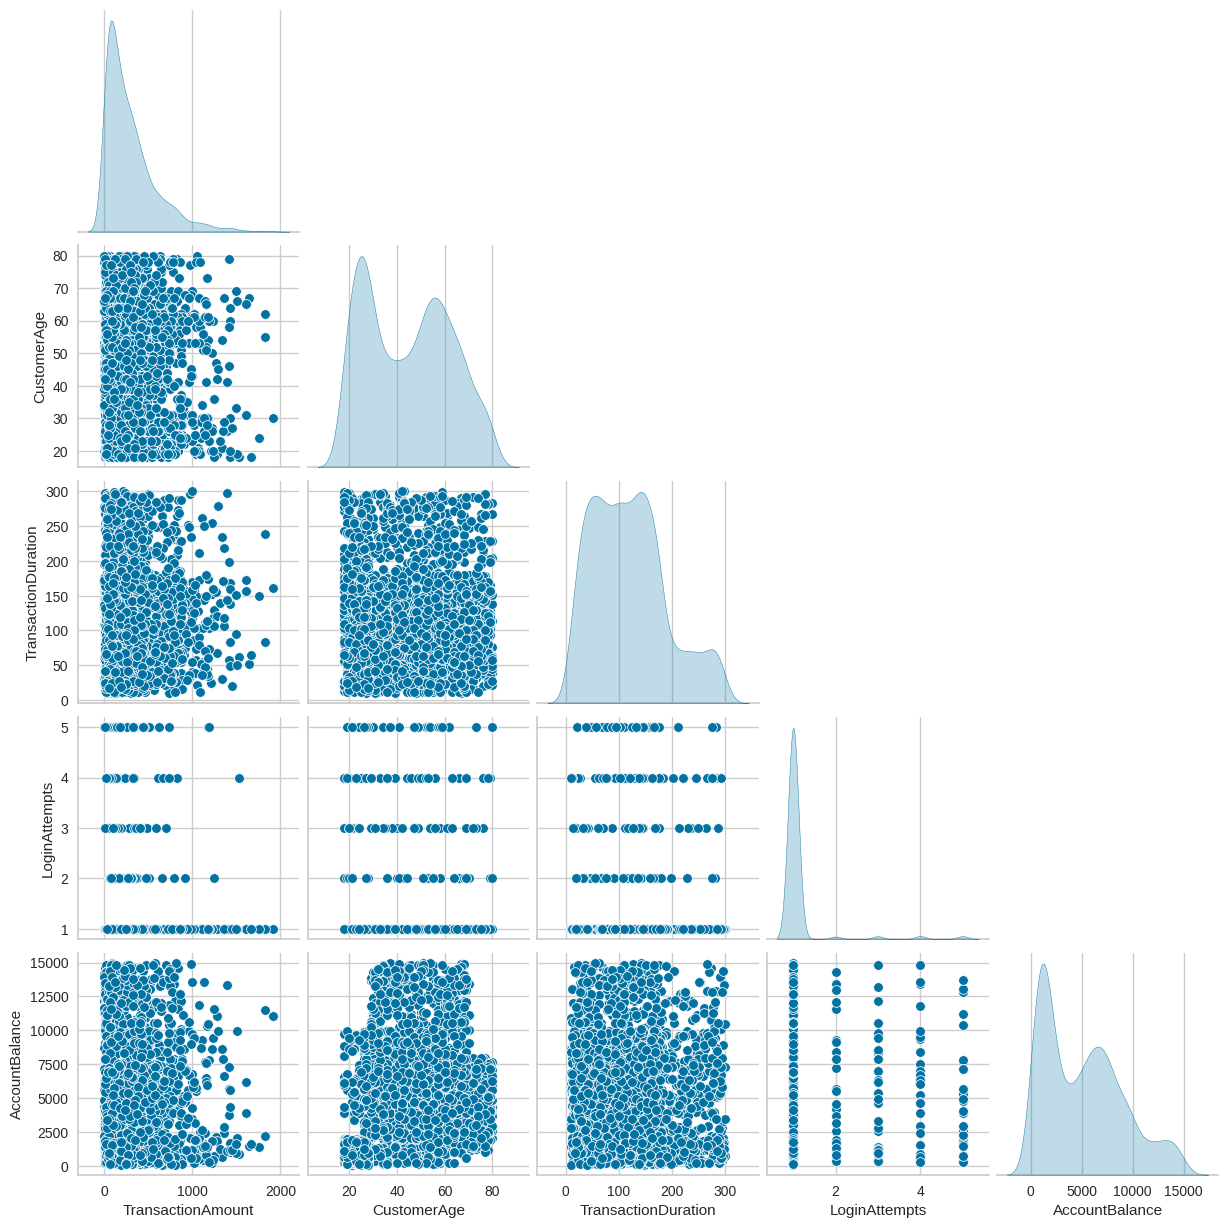

In [8]:
# Statistik Deskriptif
stats_desc = dataset.describe()

# Visualisasi Distribusi Variabel Numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Membuat subplot untuk histogram dan boxplot dengan ukuran yang sesuai
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 15))

# Loop melalui setiap kolom dalam daftar numerical_cols
for i, col in enumerate(numerical_cols):
    # Membuat histogram dengan distribusi variabel dan KDE (Kernel Density Estimate)
    sns.histplot(dataset[col], bins=30, kde=True, ax=axes[i, 0], color='#4682B4')
    axes[i, 0].set_title(f'Histogram {col}')

    # Membuat boxplot untuk melihat sebaran dan pencilan data
    sns.boxplot(x=dataset[col], ax=axes[i, 1], color='#D3D3D3')
    axes[i, 1].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# Analisis Korelasi
correlation_matrix = dataset[numerical_cols].corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasi Matriks Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter Plot untuk Hubungan Antar Variabel
sns.pairplot(dataset[numerical_cols], diag_kind="kde", corner=True)
plt.show()

**4. Visualisasi Data**

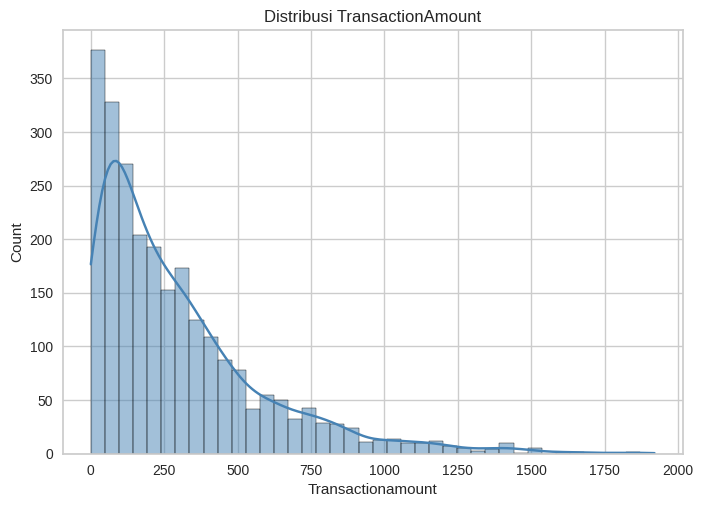

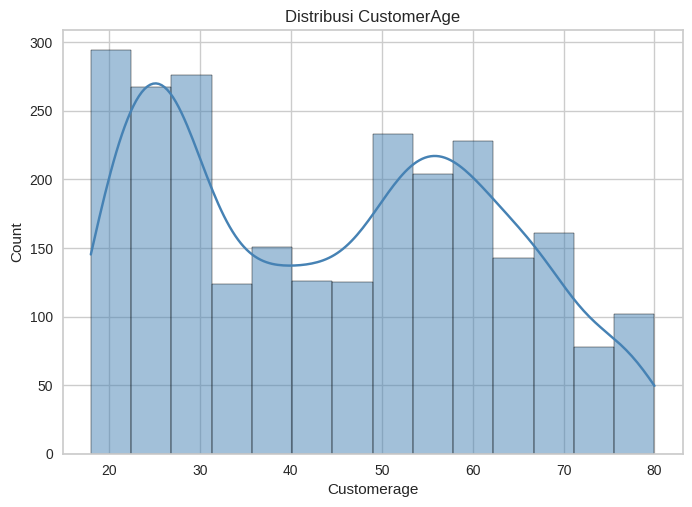

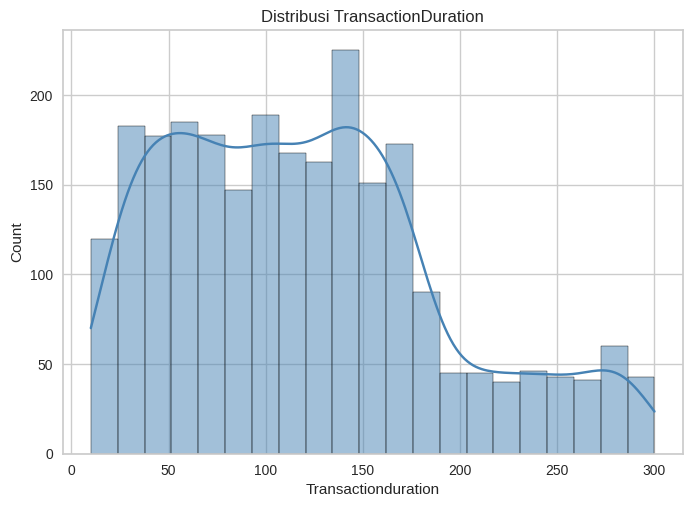

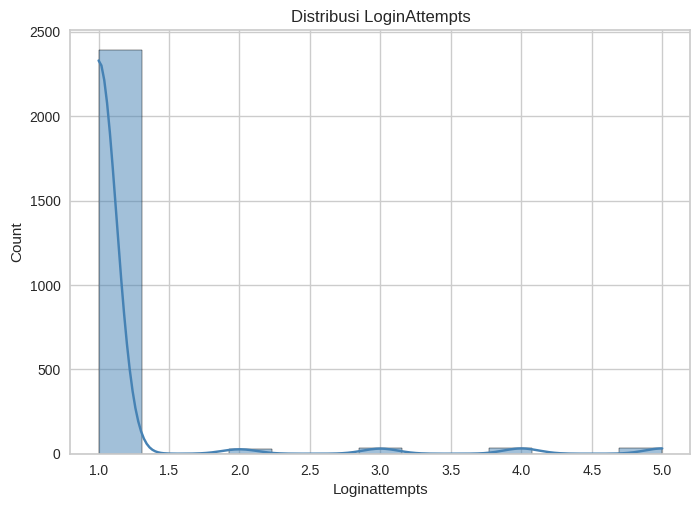

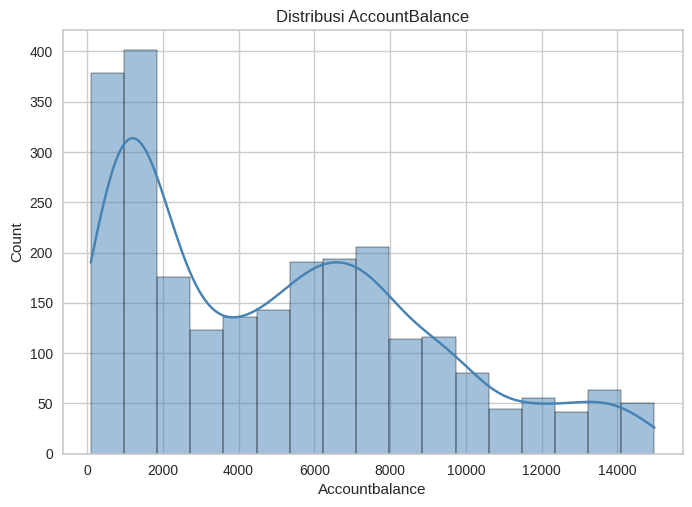

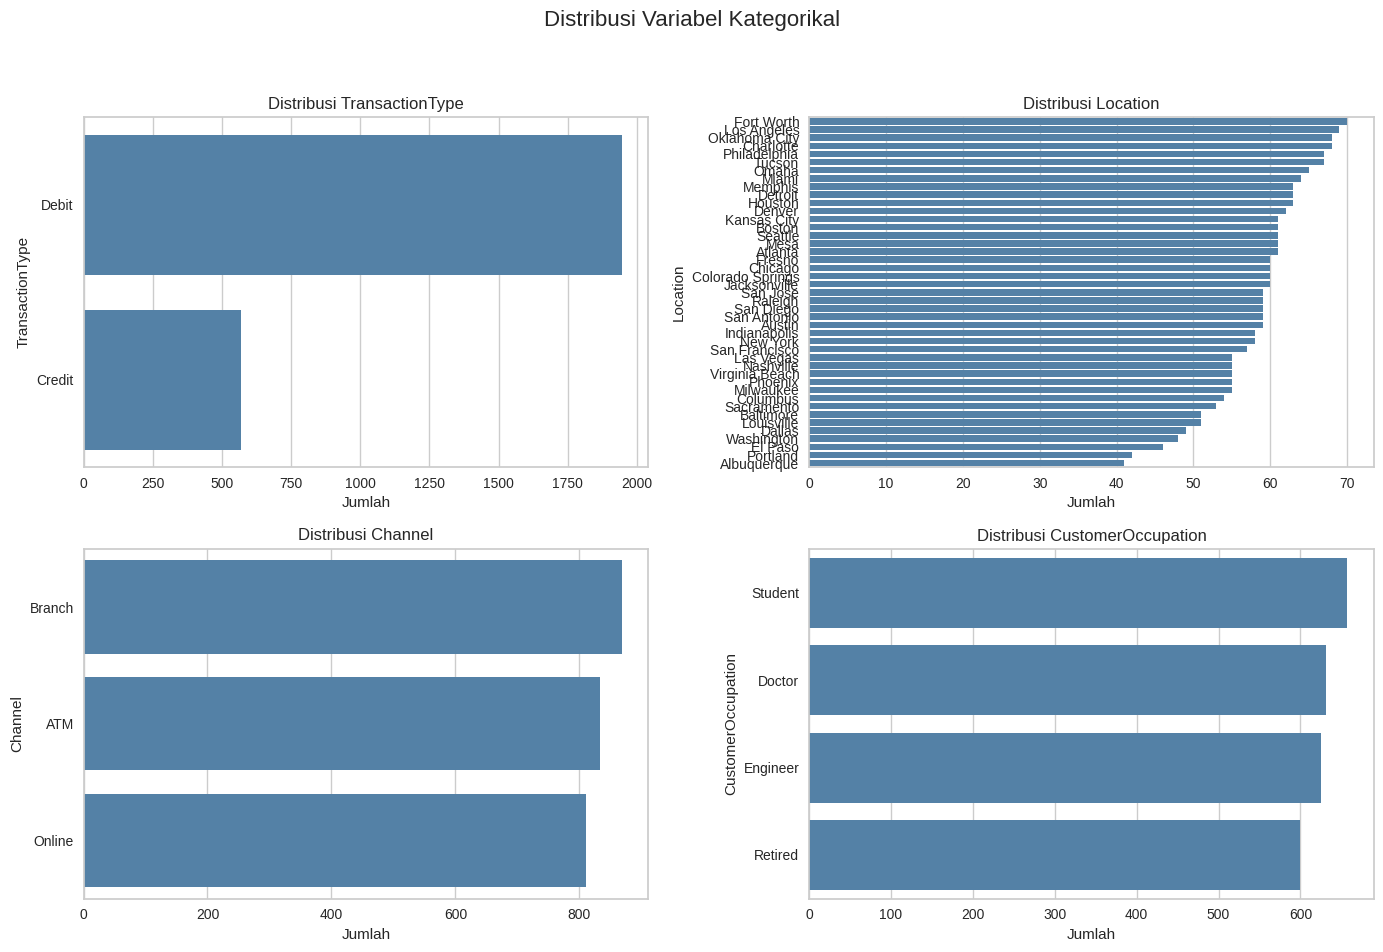

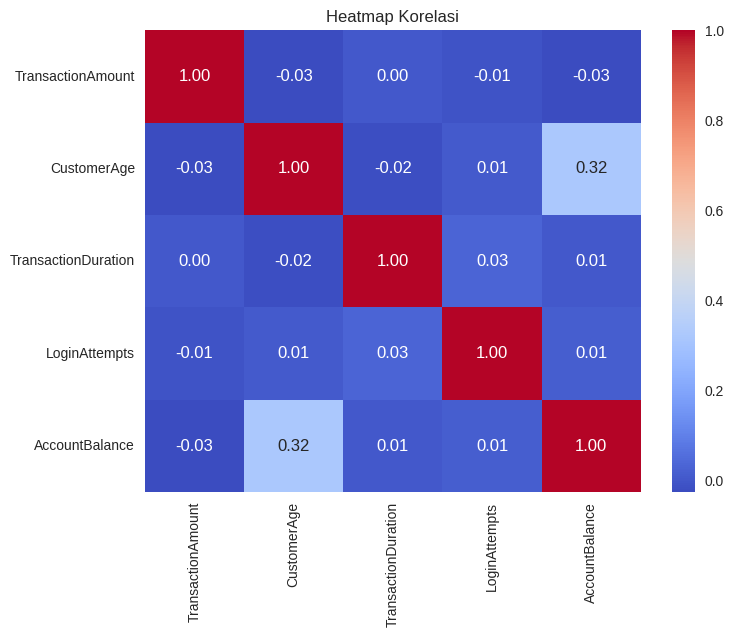

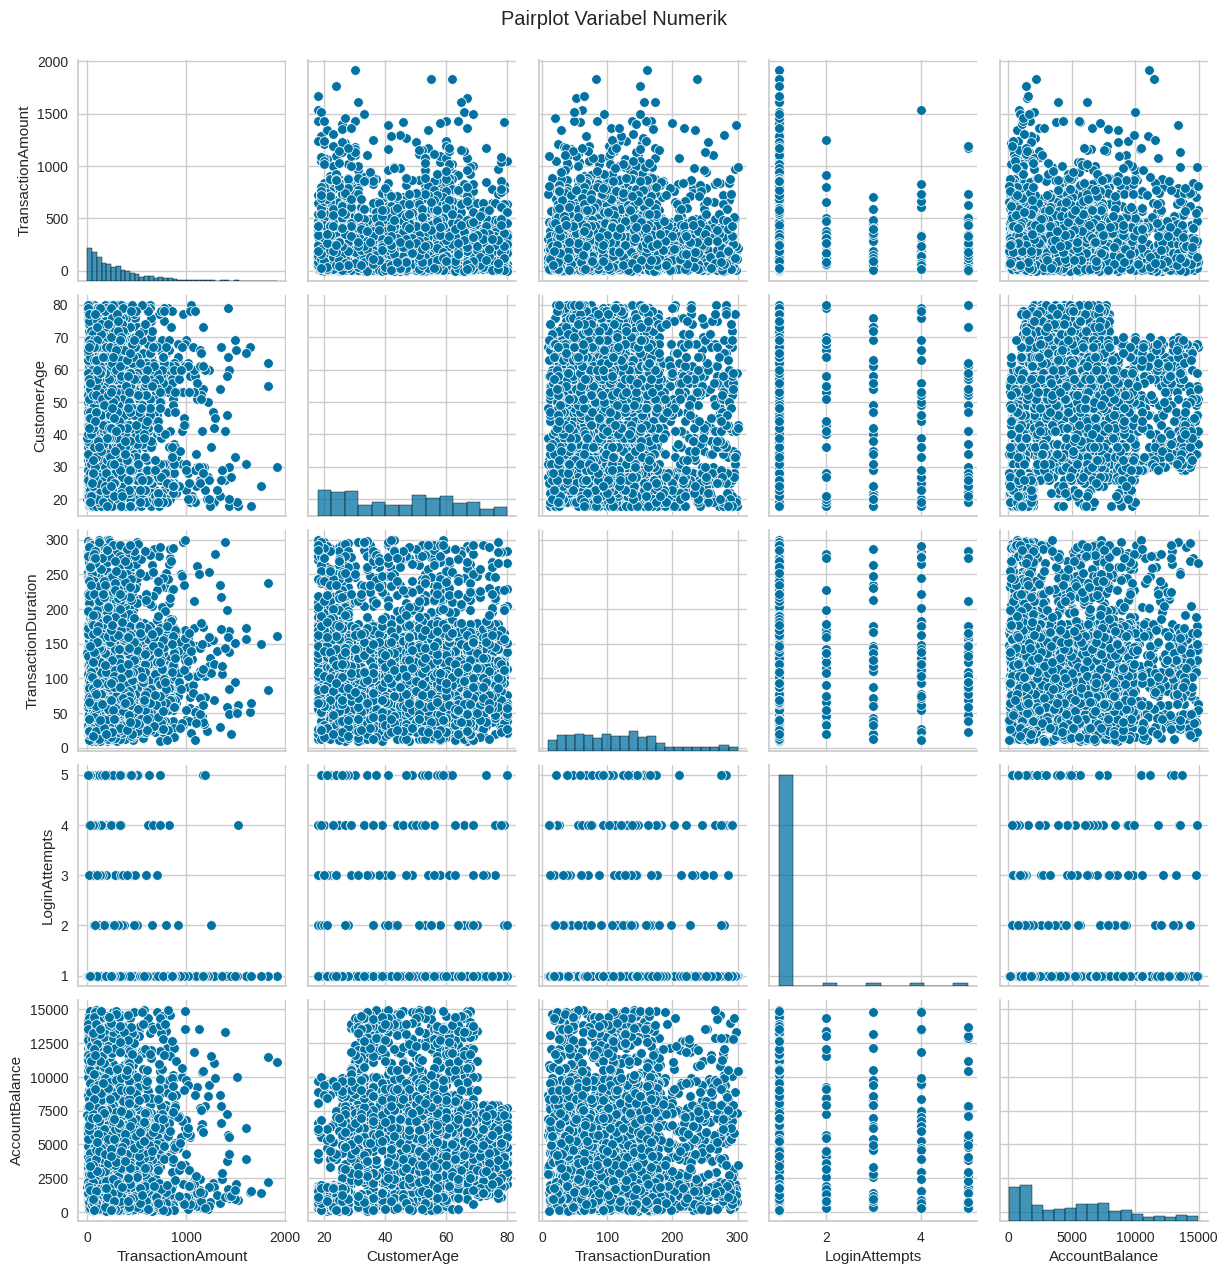

In [9]:
# Visualisasi Distribusi Variabel Numerik
for col in numerical_cols:
    sns.histplot(dataset[col], kde=True, color='#4682B4')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

# Menentukan Kolom Kategorikal yang Akan Divisualisasikan
categorical_columns = ["TransactionType", "Location", "Channel", "CustomerOccupation"]

# Membuat subplot untuk masing-masing variabel kategorikal
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Distribusi Variabel Kategorikal", fontsize=16)

# Loop untuk membuat diagram batang (countplot) untuk setiap variabel kategorikal
for col, ax in zip(categorical_columns, axes.flatten()):
    if col in dataset.columns:
        sns.countplot(y=dataset[col], color="#4682B4", ax=ax, order=dataset[col].value_counts().index)
        ax.set_title(f"Distribusi {col}")
        ax.set_xlabel("Jumlah")
        ax.set_ylabel(col)
    else:
        ax.set_title(f"{col} tidak ditemukan dalam dataset")
        ax.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = dataset[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

# Pairplot untuk Korelasi Variabel Numerik
sns.pairplot(dataset[numerical_cols])
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Menghapus atau Menangani Data Kosong (Missing Values)**

Setelah dilakukan pengecekan terhadap data, hasilnya menunjukkan bahwa dataset lengkap dan tidak terdapat nilai yang hilang (missing value).

**Menghapus Data Duplikat**

In [10]:
# Mengecek jumlah data duplikat dalam dataset
jumlah_duplikat = dataset.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Kondisi untuk menghapus baris duplikat jika ada
if jumlah_duplikat > 0:
    dataset = dataset.drop_duplicates()
    print("Data duplikat telah dihapus.")
else:
    print("Tidak ada data duplikat.")

Jumlah baris duplikat: 0
Tidak ada data duplikat.


In [11]:
# Daftar kolom yang tidak relevan untuk analisis clustering
irrelevant_columns = [
    'TransactionID',
    'AccountID',
    'TransactionDate',
    'DeviceID',
    'IP Address',
    'MerchantID',
    'PreviousTransactionDate'
]

# Menghapus kolom tidak relevan dari dataset
fixsdataset = dataset.drop(columns=irrelevant_columns, errors='ignore')

# Menampilkan beberapa baris pertama dari dataset setelah penghapusan kolom
print("Dataset setelah penghapusan kolom tidak relevan:")
print(fixsdataset.head())

Dataset setelah penghapusan kolom tidak relevan:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor                   81              1         5112.21  
1             Doctor                  141              1        13758.91  
2            Student                   56              1         1122.35  
3            Student                   25              1         8569.06  
4            Student                  198              1         7429.40  


**Encoding Data Kategorikal**

In [12]:
# Inisialisasi dua label encoder berbeda
le_transaction = LabelEncoder()
le_channel = LabelEncoder()

# Encoding saat preprocessing
fixsdataset['TransactionType_Encoded'] = le_transaction.fit_transform(fixsdataset['TransactionType'])
fixsdataset['Channel_Encoded'] = le_channel.fit_transform(fixsdataset['Channel'])

# Menampilkan 10 baris pertama dari dataset
fixsdataset.head(10)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1,0
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1,0
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1,2
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1,2
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0,2
5,92.15,Debit,Oklahoma City,ATM,18,Student,172,1,781.68,1,0
6,7.08,Credit,Seattle,ATM,37,Doctor,139,1,13316.71,0,0
7,171.42,Credit,Indianapolis,Branch,67,Retired,291,1,2796.24,0,1
8,106.23,Credit,Detroit,Branch,51,Engineer,86,1,9095.14,0,1
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,1,0


**Binning (Pengelompokan Data)**

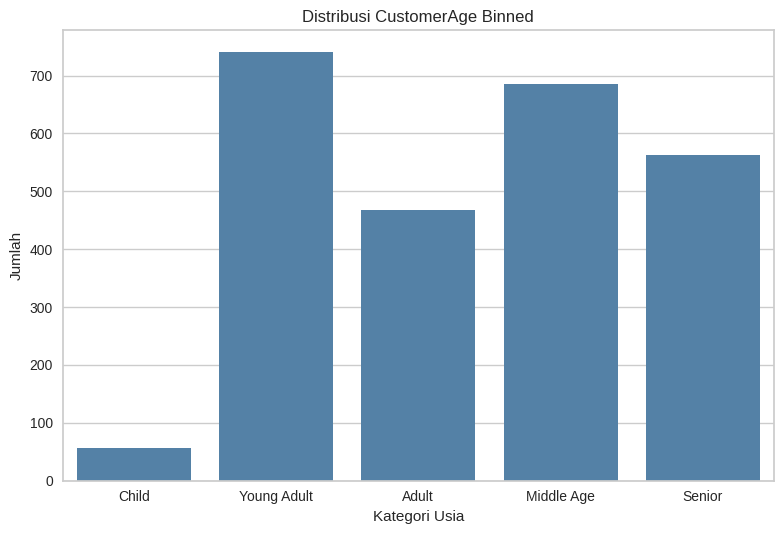

In [13]:
# Membuat bins dan labels untuk kategorisasi usia
age_bins = [0, 18, 30, 45, 60, 100]  # Rentang usia
age_labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior']

# Binning kolom CustomerAge
fixsdataset['CustomerAge_Binned'] = pd.cut(fixsdataset['CustomerAge'], bins=age_bins, labels=age_labels)

# Visualisasi distribusi kategori usia
sns.countplot(x=fixsdataset['CustomerAge_Binned'], color='#4682B4', order=age_labels)
plt.title('Distribusi CustomerAge Binned')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

**Deteksi dan Penanganan Outlier**

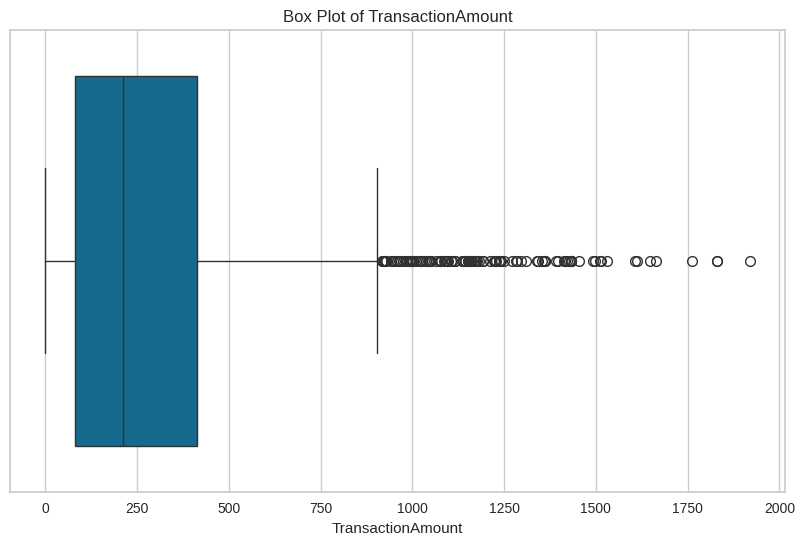

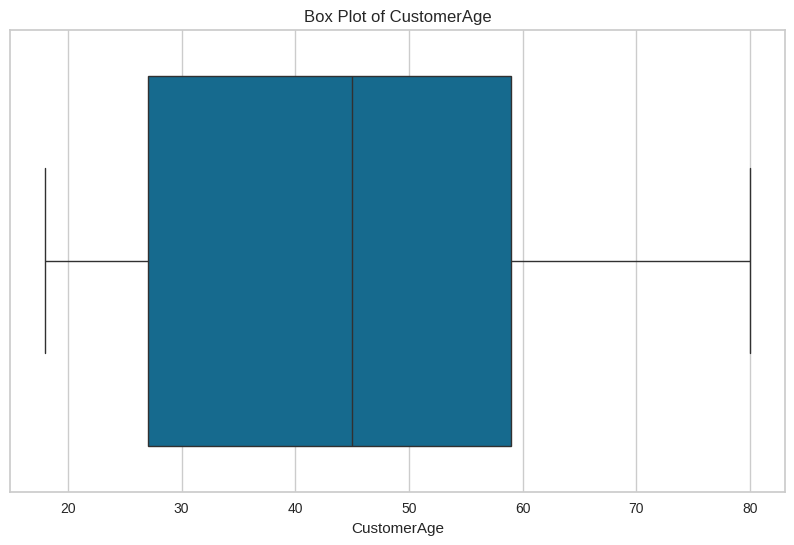

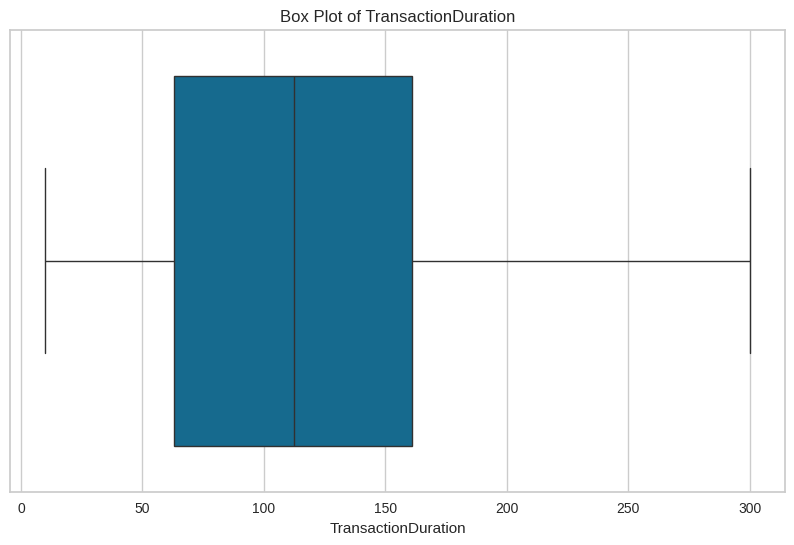

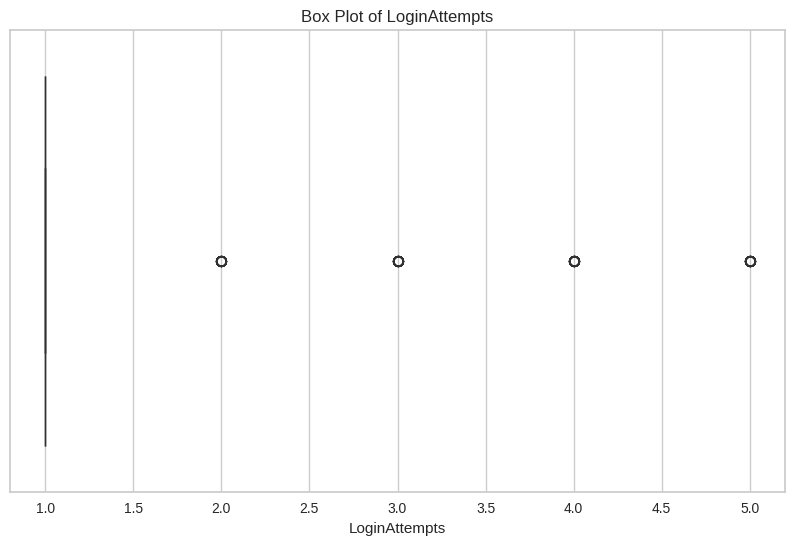

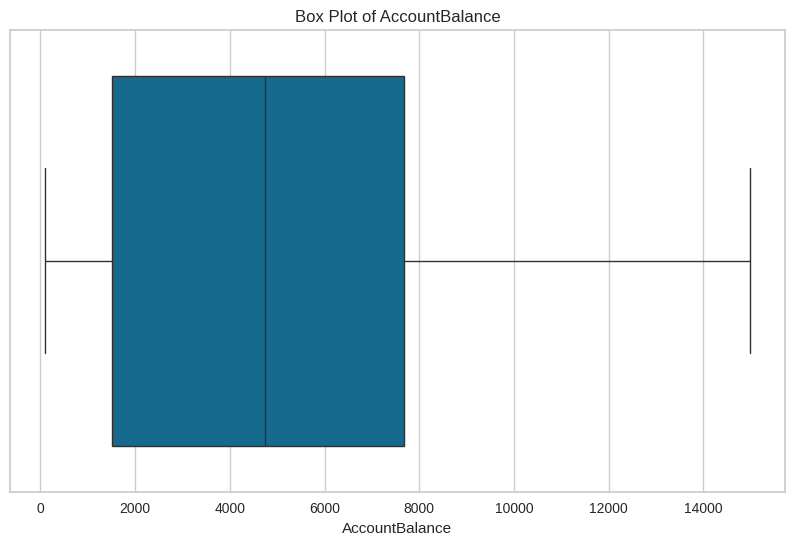

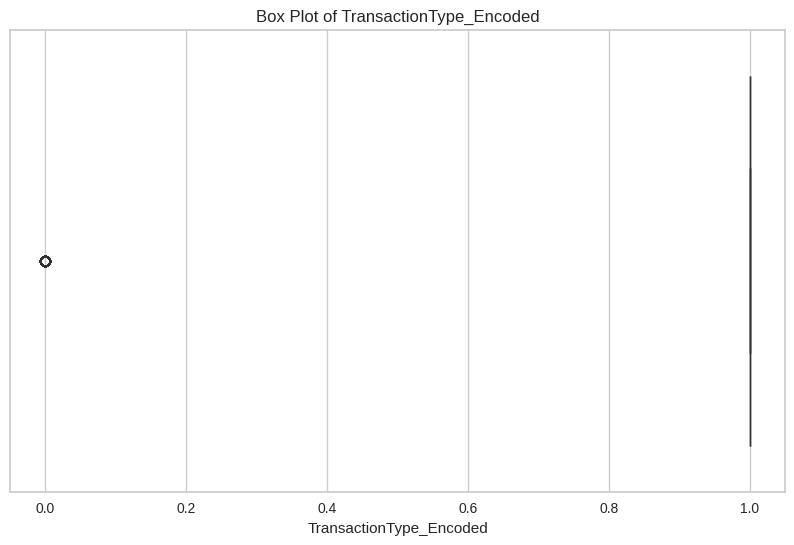

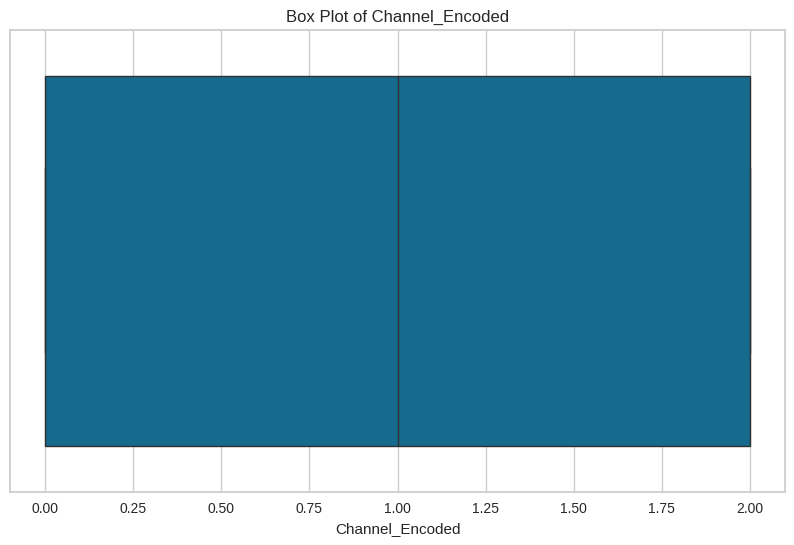

In [14]:
#Visualisasi Boxplot untuk Fitur Numerik
numerical_cols = fixsdataset.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=fixsdataset[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Batas Bawah: -417.07875000000007, Batas Atas: 913.49125
Ukuran dataset setelah menghapus outliers: (2399, 12)
Data tanpa outlier:
      TransactionAmount TransactionType          Location Channel  \
0                 14.09           Debit         San Diego     ATM   
1                376.24           Debit           Houston     ATM   
2                126.29           Debit              Mesa  Online   
3                184.50           Debit           Raleigh  Online   
4                 13.45          Credit           Atlanta  Online   
...                 ...             ...               ...     ...   
2507             856.21          Credit  Colorado Springs  Branch   
2508             251.54           Debit            Tucson  Branch   
2509              28.63           Debit         San Diego  Branch   
2510             185.97           Debit            Denver  Online   
2511             243.08          Credit      Jacksonville  Online   

      CustomerAge CustomerOccupation  Tra

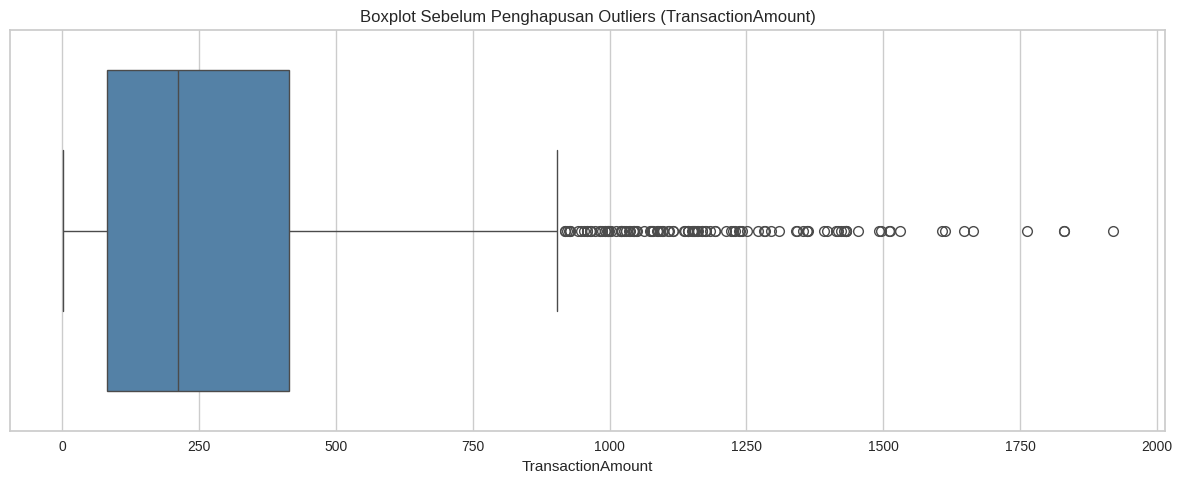

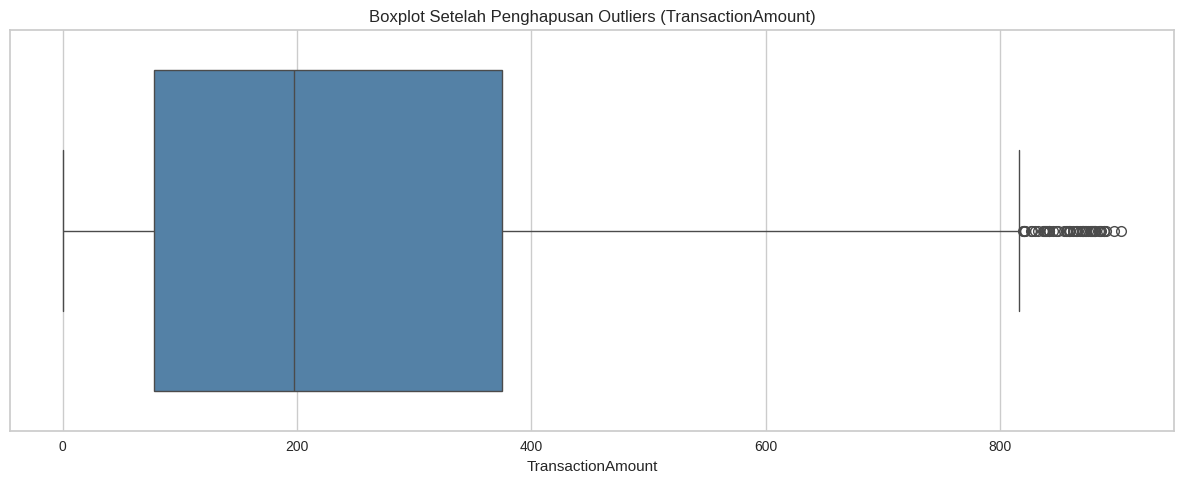

In [15]:
# Deteksi Outliers
feature = 'TransactionAmount'

# Menghitung IQR (Interquartile Range) untuk mendeteksi outliers
Q1 = fixsdataset[feature].quantile(0.25)
Q3 = fixsdataset[feature].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Batas Bawah: {lower_bound}, Batas Atas: {upper_bound}")

# Menemukan dan Menghapus Outliers
newdataset = fixsdataset[(fixsdataset[feature] >= lower_bound) & (fixsdataset[feature] <= upper_bound)]

print(f"Ukuran dataset setelah menghapus outliers: {newdataset.shape}")
print("Data tanpa outlier:")
print(newdataset)

# Visualisasi Sebelum Penghapusan Outliers
plt.figure(figsize=(12, 5))
sns.boxplot(x=fixsdataset[feature], color="#4682B4")
plt.title(f"Boxplot Sebelum Penghapusan Outliers ({feature})")
plt.xlabel(feature)
plt.tight_layout()
plt.show()

# Visualisasi Setelah Penghapusan Outliers
plt.figure(figsize=(12, 5))
sns.boxplot(x=newdataset[feature], color="#4682B4")
plt.title(f"Boxplot Setelah Penghapusan Outliers ({feature})")
plt.xlabel(feature)
plt.tight_layout()
plt.show()

**Normalisasi atau Standarisasi Fitur**

In [16]:
# Kolom numerikal yang akan dinormalisasi
numerical_cols = ['TransactionAmount', 'CustomerAge', 'AccountBalance']

# Membuat objek Min-Max Scaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom numerikal yang telah ditentukan
newdataset["TransactionAmountNorm"] = scaler.fit_transform(newdataset[["TransactionAmount"]])
newdataset["CustomerAgeNorm"] = scaler.fit_transform(newdataset[["CustomerAge"]])
newdataset["AccountBalanceNorm"] = scaler.fit_transform(newdataset[["AccountBalance"]])

# Membuat DataFrame hasil normalisasi
normalized_df = pd.DataFrame({
    "TransactionAmountNorm": newdataset["TransactionAmountNorm"],
    "CustomerAgeNorm": newdataset["CustomerAgeNorm"],
    "AccountBalanceNorm": newdataset["AccountBalanceNorm"]
})

# Menampilkan DataFrame hasil normalisasi
print("Data setelah normalisasi:")
print(normalized_df.head())

Data setelah normalisasi:
   TransactionAmountNorm  CustomerAgeNorm  AccountBalanceNorm
0               0.015317         0.838710            0.336832
1               0.416400         0.806452            0.918055
2               0.139579         0.016129            0.068637
3               0.204047         0.129032            0.569198
4               0.014608         0.129032            0.492591


<ipython-input-16-17bf5d2ee622>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["TransactionAmountNorm"] = scaler.fit_transform(newdataset[["TransactionAmount"]])
<ipython-input-16-17bf5d2ee622>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset["CustomerAgeNorm"] = scaler.fit_transform(newdataset[["CustomerAge"]])
<ipython-input-16-17bf5d2ee622>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [17]:
#Menampilkan 10 baris pertama dari DataFrame newdataset
newdataset.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded,CustomerAge_Binned,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1,0,Senior,0.015317,0.838710,0.336832
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1,0,Senior,0.416400,0.806452,0.918055
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1,2,Young Adult,0.139579,0.016129,0.068637
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1,2,Young Adult,0.204047,0.129032,0.569198
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0,2,Young Adult,0.014608,0.129032,0.492591


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**1. Pilih algoritma clustering yang sesuai.**

In [18]:
# Membuat subset dari dataset
X = newdataset.iloc[:, [9, 10, 12, 13, 14]]

# Menampilkan lima baris pertama dari subset dataset
X.head()

,TransactionType_Encoded,Channel_Encoded,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm
0,1,0,0.015317,0.838710,0.336832
1,1,0,0.416400,0.806452,0.918055
2,1,2,0.139579,0.016129,0.068637
3,1,2,0.204047,0.129032,0.569198
4,0,2,0.014608,0.129032,0.492591


**2. Latih model dengan data menggunakan algoritma tersebut.**

In [19]:
# Dataset hasil preprocessing
numerical_cols = ['TransactionType_Encoded', 'Channel_Encoded', 'TransactionAmountNorm', 'CustomerAgeNorm', 'AccountBalanceNorm']
X = newdataset[numerical_cols]

# Melatih model KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Menentukan cluster untuk setiap data berdasarkan hasil clustering
newdataset['Cluster_KMeans'] = kmeans.labels_

# Menampilkan jumlah anggota pada setiap cluster
print("Jumlah anggota per cluster (KMeans):")
print(newdataset['Cluster_KMeans'].value_counts())

# Menampilkan cuplikan hasil clustering KMeans
print("\nHasil Clustering (KMeans):")
print(newdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Cluster_KMeans']].head())

# Menampilkan detail untuk setiap cluster
cluster_details = []
for cluster in newdataset['Cluster_KMeans'].unique():
    cluster_data = newdataset[newdataset['Cluster_KMeans'] == cluster]
    cluster_info = {
        "Cluster": cluster,
        "TransactionAmount Min": cluster_data['TransactionAmount'].min(),
        "TransactionAmount Max": cluster_data['TransactionAmount'].max(),
        "CustomerAge Min": cluster_data['CustomerAge'].min(),
        "CustomerAge Max": cluster_data['CustomerAge'].max(),
        "AccountBalance Min": cluster_data['AccountBalance'].min(),
        "AccountBalance Max": cluster_data['AccountBalance'].max(),
        "TransactionType_Debit": cluster_data["TransactionType_Encoded"].unique().tolist(),
        "Channel_Online": cluster_data["Channel_Encoded"].unique().tolist()
    }
    cluster_details.append(cluster_info)

# Menampilkan detail klaster
print("\nDetail Pembagian Klaster:")
for detail in cluster_details:
    print(f"Cluster {detail['Cluster']}:")
    print(f"  TransactionAmount: {detail['TransactionAmount Min']} - {detail['TransactionAmount Max']}")
    print(f"  CustomerAge: {detail['CustomerAge Min']} - {detail['CustomerAge Max']}")
    print(f"  AccountBalance: {detail['AccountBalance Min']} - {detail['AccountBalance Max']}")
    print(f"  TransactionType_Encoded: {', '.join(map(str, detail['TransactionType_Debit']))}")
    print(f"  Channel_Online: {', '.join(map(str, detail['Channel_Online']))}")
    print()

Jumlah anggota per cluster (KMeans):
Cluster_KMeans
2    835
1    791
0    773
Name: count, dtype: int64

Hasil Clustering (KMeans):
   TransactionAmount  CustomerAge  AccountBalance  Cluster_KMeans
0              14.09           70         5112.21               1
1             376.24           68        13758.91               1
2             126.29           19         1122.35               0
3             184.50           26         8569.06               0
4              13.45           26         7429.40               0

Detail Pembagian Klaster:
Cluster 1:
  TransactionAmount: 0.32 - 885.33
  CustomerAge: 18 - 80
  AccountBalance: 112.76 - 14977.99
  TransactionType_Encoded: 1, 0
  Channel_Online: 0

Cluster 0:
  TransactionAmount: 0.26 - 903.19
  CustomerAge: 18 - 80
  AccountBalance: 101.25 - 14852.42
  TransactionType_Encoded: 1, 0
  Channel_Online: 2

Cluster 2:
  TransactionAmount: 0.45 - 886.19
  CustomerAge: 18 - 80
  AccountBalance: 105.01 - 14904.9
  TransactionType_Encode

<ipython-input-19-5b0d8b2cd0e6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['Cluster_KMeans'] = kmeans.labels_


In [20]:
# Dataset hasil preprocessing
numerical_cols = ['TransactionType_Encoded', 'Channel_Encoded', 'TransactionAmountNorm', 'CustomerAgeNorm', 'AccountBalanceNorm']
X_selected = newdataset[numerical_cols]

# Melatih model Agglomerative Clustering dengan 3 klaster
agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Menentukan klaster untuk setiap data berdasarkan hasil clustering
newdataset['Cluster_Agglomerative'] = agg_clustering.fit_predict(X_selected)

# Menampilkan jumlah anggota pada setiap klaster
print("Jumlah anggota per cluster (Agglomerative Clustering):")
print(newdataset['Cluster_Agglomerative'].value_counts())

# Menampilkan cuplikan hasil clustering Agglomerative Clustering
print("\nHasil Clustering (Agglomerative Clustering):")
print(newdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Cluster_Agglomerative']].head())

# Menampilkan rentang detail untuk tiap klaster
cluster_details = []
for cluster in newdataset['Cluster_Agglomerative'].unique():
    cluster_data = newdataset[newdataset['Cluster_Agglomerative'] == cluster]
    cluster_info = {
        "Cluster": cluster,
        "TransactionAmount Min": cluster_data['TransactionAmount'].min(),
        "TransactionAmount Max": cluster_data['TransactionAmount'].max(),
        "CustomerAge Min": cluster_data['CustomerAge'].min(),
        "CustomerAge Max": cluster_data['CustomerAge'].max(),
        "AccountBalance Min": cluster_data['AccountBalance'].min(),
        "AccountBalance Max": cluster_data['AccountBalance'].max(),
        "TransactionType_Encoded": cluster_data['TransactionType_Encoded'].unique().tolist(),
        "Channel_Encoded": cluster_data['Channel_Encoded'].unique().tolist()
    }
    cluster_details.append(cluster_info)

# Menampilkan detail klaster
print("\nDetail Pembagian Klaster:")
for detail in cluster_details:
    print(f"Cluster {detail['Cluster']}:")
    print(f"  TransactionAmount: {detail['TransactionAmount Min']} - {detail['TransactionAmount Max']}")
    print(f"  CustomerAge: {detail['CustomerAge Min']} - {detail['CustomerAge Max']}")
    print(f"  AccountBalance: {detail['AccountBalance Min']} - {detail['AccountBalance Max']}")
    print(f"  TransactionType_Encoded: {', '.join(map(str, detail['TransactionType_Encoded']))}")
    print(f"  Channel_Encoded: {', '.join(map(str, detail['Channel_Encoded']))}")
    print()

Jumlah anggota per cluster (Agglomerative Clustering):
Cluster_Agglomerative
0    906
1    773
2    720
Name: count, dtype: int64

Hasil Clustering (Agglomerative Clustering):
   TransactionAmount  CustomerAge  AccountBalance  Cluster_Agglomerative
0              14.09           70         5112.21                      2
1             376.24           68        13758.91                      2
2             126.29           19         1122.35                      1
3             184.50           26         8569.06                      1
4              13.45           26         7429.40                      1

Detail Pembagian Klaster:
Cluster 2:
  TransactionAmount: 0.32 - 880.04
  CustomerAge: 18 - 80
  AccountBalance: 112.76 - 14977.99
  TransactionType_Encoded: 1
  Channel_Encoded: 0

Cluster 1:
  TransactionAmount: 0.26 - 903.19
  CustomerAge: 18 - 80
  AccountBalance: 101.25 - 14852.42
  TransactionType_Encoded: 1, 0
  Channel_Encoded: 2

Cluster 0:
  TransactionAmount: 0.45 - 886.1

<ipython-input-20-b98c12958f14>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset['Cluster_Agglomerative'] = agg_clustering.fit_predict(X_selected)


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

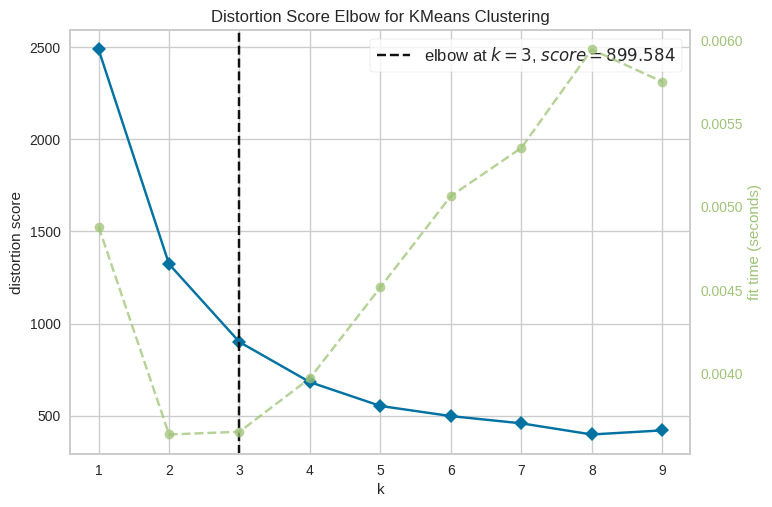

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [22]:
# Menghitung Silhouette Score secara keseluruhan
silhouette_agg = silhouette_score(X_selected, newdataset['Cluster_Agglomerative'])

silhouette_kmeans = None
if len(set(newdataset['Cluster_KMeans'])) > 1:
    silhouette_kmeans = silhouette_score(X_selected, newdataset['Cluster_KMeans'])

# Tampilkan Overall Silhouette Score
print(f"Overall Silhouette Score (Agglomerative Clustering): {silhouette_agg:.2f}")
if silhouette_kmeans:
    print(f"Overall Silhouette Score (KMeans): {silhouette_kmeans:.2f}")

Overall Silhouette Score (Agglomerative Clustering): 0.39
Overall Silhouette Score (KMeans): 0.40


Model Agglomerative Clustering tidak digunakan karena KMeans memberikan silhouette score yang lebih baik dan konsisten.

In [23]:
# Hapus kolom terkait Agglomerative Clustering dari newdataset
columns_to_drop = ['Cluster_Agglomerative']
newdataset = newdataset.drop(columns=columns_to_drop)

# Verifikasi DataFrame setelah penghapusan
print("Kolom Agglomerative Clustering telah dihapus. Kolom saat ini:")
print(newdataset.columns)

Kolom Agglomerative Clustering telah dihapus. Kolom saat ini:
Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType_Encoded',
       'Channel_Encoded', 'CustomerAge_Binned', 'TransactionAmountNorm',
       'CustomerAgeNorm', 'AccountBalanceNorm', 'Cluster_KMeans'],
      dtype='object')


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

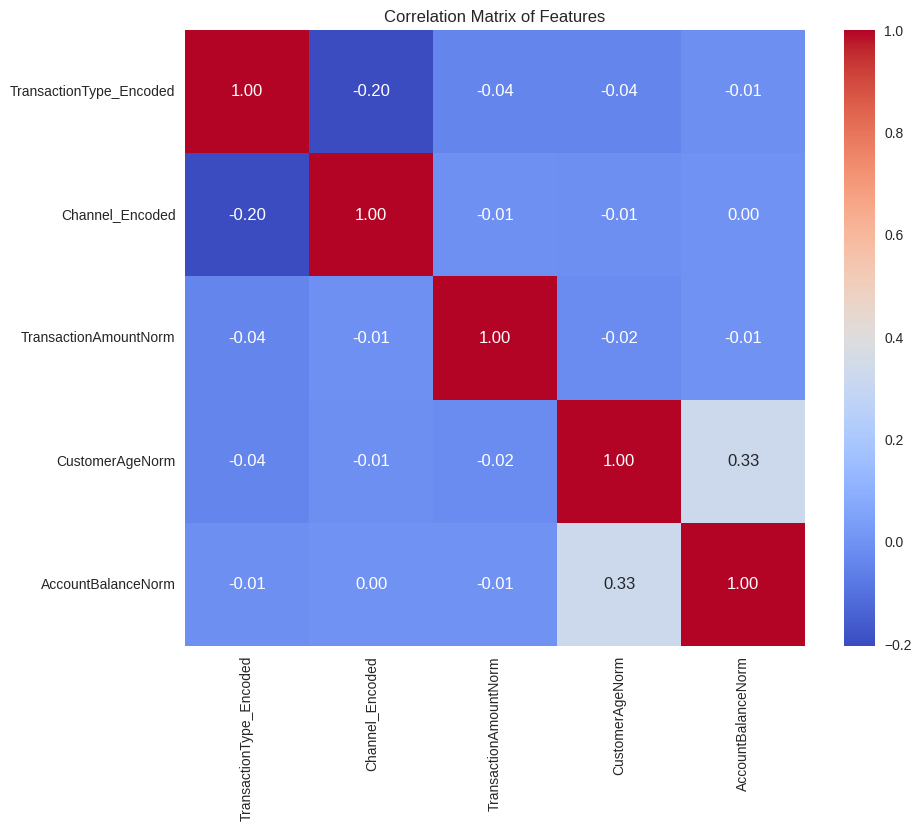

In [24]:
# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [25]:
# Melakukan PCA untuk mereduksi dimensi
pca = PCA(n_components=3)  # Memilih jumlah komponen utama
X_pca = pca.fit_transform(X_selected)

# Melihat proporsi variansi yang dijelaskan oleh setiap komponen
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Menampilkan data setelah PCA
print("\nData setelah PCA:")
print(X_pca[:5])

Explained Variance Ratio:
[0.63856619 0.16090565 0.09686871]

Data setelah PCA:
[[-1.01569738  0.06668434  0.33575363]
 [-1.01584854  0.03510018  0.6475862 ]
 [ 0.9668452   0.41000562 -0.45595148]
 [ 0.96677837  0.38344059 -0.06502746]
 [ 1.1081643  -0.59312485 -0.17777057]]


In [26]:
# KMeans setelah feature selection (misalnya, X_pca)
kmeans = KMeans(n_clusters=3, random_state=0)
newdataset['Cluster_KMeans_FS'] = kmeans.fit_predict(X_pca)

# Evaluasi Silhouette Score
silhouette_kmeans_fs = silhouette_score(X_pca, newdataset['Cluster_KMeans_FS'])
print(f"Silhouette Score (KMeans - After Feature Selection): {silhouette_kmeans_fs:.2f}")

Silhouette Score (KMeans - After Feature Selection): 0.51


In [27]:
# Menampilkan jumlah anggota pada setiap cluster
print("Jumlah anggota per cluster (KMeans):")
print(newdataset['Cluster_KMeans_FS'].value_counts())

# Menampilkan cuplikan hasil clustering KMeans
print("\nHasil Clustering (KMeans):")
print(newdataset[['TransactionAmount', 'CustomerAge', 'AccountBalance', 'Cluster_KMeans_FS']].head())

# Menampilkan detail untuk setiap cluster
cluster_details = []
for cluster in newdataset['Cluster_KMeans_FS'].unique():
    cluster_data = newdataset[newdataset['Cluster_KMeans_FS'] == cluster]
    cluster_info = {
        "Cluster": cluster,
        "TransactionAmount Min": cluster_data['TransactionAmount'].min(),
        "TransactionAmount Max": cluster_data['TransactionAmount'].max(),
        "CustomerAge Min": cluster_data['CustomerAge'].min(),
        "CustomerAge Max": cluster_data['CustomerAge'].max(),
        "AccountBalance Min": cluster_data['AccountBalance'].min(),
        "AccountBalance Max": cluster_data['AccountBalance'].max(),
        "TransactionType_Debit": cluster_data["TransactionType_Encoded"].unique().tolist(),
        "Channel_Online": cluster_data["Channel_Encoded"].unique().tolist()
    }
    cluster_details.append(cluster_info)

# Menampilkan detail klaster
print("\nDetail Pembagian Klaster:")
for detail in cluster_details:
    print(f"Cluster {detail['Cluster']}:")
    print(f"  TransactionAmount: {detail['TransactionAmount Min']} - {detail['TransactionAmount Max']}")
    print(f"  CustomerAge: {detail['CustomerAge Min']} - {detail['CustomerAge Max']}")
    print(f"  AccountBalance: {detail['AccountBalance Min']} - {detail['AccountBalance Max']}")
    print(f"  TransactionType_Encoded: {', '.join(map(str, detail['TransactionType_Debit']))}")
    print(f"  Channel_Online: {', '.join(map(str, detail['Channel_Online']))}")
    print()

Jumlah anggota per cluster (KMeans):
Cluster_KMeans_FS
1    835
2    791
0    773
Name: count, dtype: int64

Hasil Clustering (KMeans):
   TransactionAmount  CustomerAge  AccountBalance  Cluster_KMeans_FS
0              14.09           70         5112.21                  2
1             376.24           68        13758.91                  2
2             126.29           19         1122.35                  0
3             184.50           26         8569.06                  0
4              13.45           26         7429.40                  0

Detail Pembagian Klaster:
Cluster 2:
  TransactionAmount: 0.32 - 885.33
  CustomerAge: 18 - 80
  AccountBalance: 112.76 - 14977.99
  TransactionType_Encoded: 1, 0
  Channel_Online: 0

Cluster 0:
  TransactionAmount: 0.26 - 903.19
  CustomerAge: 18 - 80
  AccountBalance: 101.25 - 14852.42
  TransactionType_Encoded: 1, 0
  Channel_Online: 2

Cluster 1:
  TransactionAmount: 0.45 - 886.19
  CustomerAge: 18 - 80
  AccountBalance: 105.01 - 14904.9
  T

Cluster_KMeans_FS memberikan silhouette score yang lebih optimal, kolom Cluster_KMeans dihapus untuk menghindari redundansi hasil clustering.

In [28]:
# Hapus kolom terkait Cluster_KMeans  dari newdataset
columns_to_drop = ['Cluster_KMeans']
newdataset = newdataset.drop(columns=columns_to_drop)

# Verifikasi DataFrame setelah penghapusan
print("Kolom Cluster_KMeans telah dihapus. Kolom saat ini:")
print(newdataset.columns)

Kolom Cluster_KMeans telah dihapus. Kolom saat ini:
Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionType_Encoded',
       'Channel_Encoded', 'CustomerAge_Binned', 'TransactionAmountNorm',
       'CustomerAgeNorm', 'AccountBalanceNorm', 'Cluster_KMeans_FS'],
      dtype='object')


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

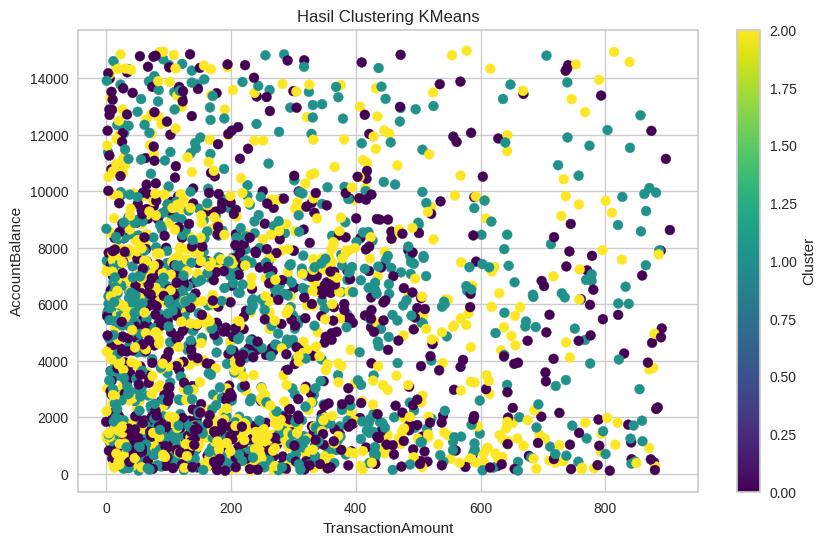

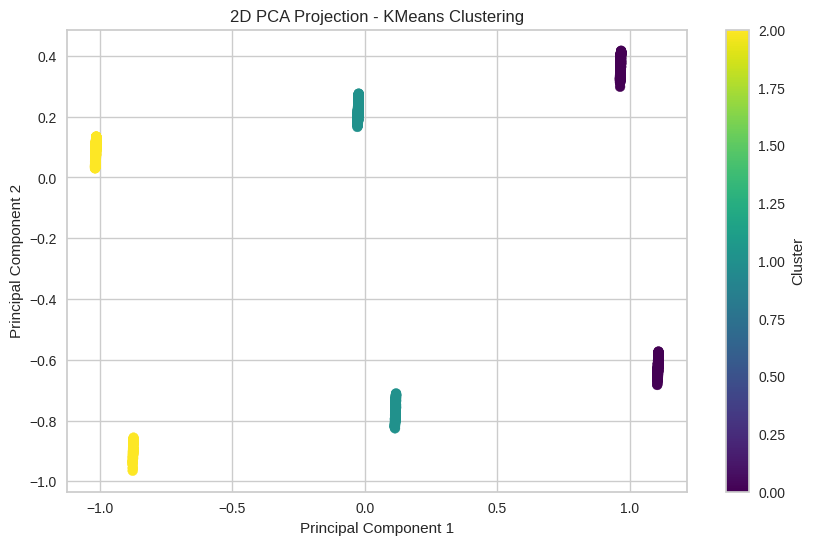

In [29]:
# Scatter plot untuk KMeans Clustering
plt.figure(figsize=(10, 6))
plt.scatter(newdataset['TransactionAmount'], newdataset['AccountBalance'],
            c=newdataset['Cluster_KMeans_FS'], cmap='viridis', s=50)
plt.title('Hasil Clustering KMeans')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

# 2D PCA Projection untuk visualisasi clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(newdataset[['TransactionAmountNorm', 'CustomerAgeNorm', 'AccountBalanceNorm',
                                      'TransactionType_Encoded', 'Channel_Encoded']])

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=newdataset['Cluster_KMeans_FS'], cmap='viridis', s=50)
plt.title('2D PCA Projection - KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [30]:
# Menyalin dataframe normalisasi untuk keperluan inverse transform
df_normalized = newdataset.copy()

# Menambahkan kolom cluster dari KMeans setelah feature selection (PCA)
df_normalized['Cluster'] = newdataset['Cluster_KMeans_FS']

In [31]:
# Inverse transform untuk kolom yang diencoding
fixsdataset['TransactionType'] = le_transaction.inverse_transform(fixsdataset['TransactionType_Encoded'])
fixsdataset['Channel'] = le_channel.inverse_transform(fixsdataset['Channel_Encoded'])

In [32]:
# Membuat dataframe akhir untuk interpretasi klaster
final_cluster_df = df_normalized[['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
                                  'AccountBalance', 'TransactionType_Encoded', 'Channel_Encoded', 'CustomerAge_Binned', 'TransactionAmountNorm', 'CustomerAgeNorm', 'AccountBalanceNorm', 'Cluster']]

# Menampilkan cuplikan data
print("Data Asli dengan Label Cluster:")
print(final_cluster_df.head())

Data Asli dengan Label Cluster:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM           70   
1             376.24           Debit    Houston     ATM           68   
2             126.29           Debit       Mesa  Online           19   
3             184.50           Debit    Raleigh  Online           26   
4              13.45          Credit    Atlanta  Online           26   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                   81              1         5112.21   
1             Doctor                  141              1        13758.91   
2            Student                   56              1         1122.35   
3            Student                   25              1         8569.06   
4            Student                  198              1         7429.40   

   TransactionType_Encoded  Channel_Encoded CustomerAge_Binned  \
0           

In [33]:
# Statistik deskriptif per klaster
cluster_summary = final_cluster_df.groupby('Cluster').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'CustomerAge': ['min', 'max', 'mean'],
    'AccountBalance': ['min', 'max', 'mean'],
    'TransactionType': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0]
})

print("Ringkasan Karakteristik Tiap Klaster:")
print(cluster_summary)

Ringkasan Karakteristik Tiap Klaster:
        TransactionAmount                     CustomerAge                 \
                      min     max        mean         min max       mean   
Cluster                                                                    
0                    0.26  903.19  254.079715          18  80  44.513583   
1                    0.45  886.19  252.523784          18  80  44.532934   
2                    0.32  885.33  259.229836          18  80  45.070796   

        AccountBalance                        TransactionType  Channel  
                   min       max         mean        <lambda> <lambda>  
Cluster                                                                 
0               101.25  14852.42  5109.813389           Debit   Online  
1               105.01  14904.90  5216.244275           Debit   Branch  
2               112.76  14977.99  5089.235954           Debit      ATM  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [34]:
# Inverse transform untuk kolom numerik
df_normalized['TransactionAmount'] = scaler.inverse_transform(df_normalized[['TransactionAmountNorm']])
df_normalized['CustomerAge'] = scaler.inverse_transform(df_normalized[['CustomerAgeNorm']])
df_normalized['AccountBalance'] = scaler.inverse_transform(df_normalized[['AccountBalanceNorm']])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).

Berikut adalah analisis karakteristik untuk setiap cluster dari model KMeans

### **Cluster 0:**
- **Rata-rata Transaction Amount**: 254.08  
- **Rata-rata Customer Age**: 44.51 tahun  
- **Rata-rata Account Balance**: 5,109.81  
- **Channel**: Online  
- **Transaction Type**: Debit  
- **Analisis**:  
  Cluster ini terdiri dari pelanggan dengan usia menengah dan saldo akun sedang. Mereka melakukan transaksi debit dengan jumlah rata-rata yang moderat melalui saluran online. Ini bisa mengindikasikan bahwa pelanggan dalam cluster ini adalah pengguna aktif layanan digital, nyaman bertransaksi online, dan cenderung melakukan pengeluaran yang stabil.

### **Cluster 1:**
- **Rata-rata Transaction Amount**: 252.52  
- **Rata-rata Customer Age**: 44.53 tahun  
- **Rata-rata Account Balance**: 5,216.24  
- **Channel**: Branch (Cabang)  
- **Transaction Type**: Debit  
- **Analisis**:  
  Cluster ini mencakup pelanggan dengan usia yang mirip dengan cluster 0 namun lebih memilih untuk bertransaksi di cabang fisik. Meskipun nominal transaksinya hampir sama, preferensi saluran menunjukkan bahwa pelanggan dalam cluster ini mungkin lebih nyaman dengan interaksi langsung atau lebih tradisional dalam melakukan perbankan.

### **Cluster 2:**
- **Rata-rata Transaction Amount**: 259.23  
- **Rata-rata Customer Age**: 45.07 tahun  
- **Rata-rata Account Balance**: 5,089.24  
- **Channel**: ATM  
- **Transaction Type**: Debit  
- **Analisis**:  
  Cluster ini berisi pelanggan dengan usia sedikit lebih tua dan saldo akun yang hampir setara dengan cluster lainnya. Mereka cenderung melakukan transaksi debit melalui ATM. Ini mungkin menunjukkan preferensi terhadap layanan mandiri yang cepat dan mudah diakses, serta kemungkinan perilaku yang lebih hemat atau efisien dalam mengelola keuangan.

2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Secara umum, ya hasil clustering ini cukup masuk akal dan sesuai dengan logika bisnis, karena membagi pelanggan berdasarkan perilaku transaksi, usia, saldo akun, dan saluran transaksi yang digunakan. Masing-masing cluster menunjukkan pola preferensi dan karakteristik yang berbeda namun realistis:

- **Cluster 0 (Online Users)**  
  Pelanggan dengan rata-rata usia menengah, saldo sedang, dan lebih nyaman menggunakan layanan online. Ini logis karena saat ini banyak pelanggan usia produktif mulai beralih ke digital banking untuk kenyamanan dan efisiensi.

- **Cluster 1 (Branch-Goers)**  
  Meskipun mirip secara usia dan nominal transaksi dengan Cluster 0, pelanggan di sini lebih suka bertransaksi di cabang. Ini bisa jadi karena mereka lebih konservatif atau lebih suka interaksi langsung. Ini sesuai dengan kenyataan bahwa tidak semua pelanggan nyaman dengan digital banking.

- **Cluster 2 (ATM Users)**  
  Usia sedikit lebih tua, saldo mirip, tetapi lebih memilih ATM. Mereka mungkin menghargai kontrol dan kecepatan, atau hanya menggunakan layanan dasar. Juga masuk akal, karena banyak orang masih mengandalkan ATM untuk kebutuhan sehari-hari.

**Ada beberapa pola menarik yang bisa dimanfaatkan untuk strategi bisnis dan segmentasi pasar:**

**Segmentasi Layanan:**
- **Cluster 0** → bisa ditargetkan dengan promosi dan fitur digital banking (e.g. cashback online, aplikasi mobile banking).
- **Cluster 1** → cocok untuk penawaran layanan personal di cabang, seperti produk keuangan berbasis konsultasi (kredit, investasi).
- **Cluster 2** → bisa diarahkan untuk upgrade layanan ATM atau mendorong ke digital dengan edukasi dan insentif.

**Efisiensi Operasional:**
- Karena Cluster 0 dan 2 menggunakan saluran non-cabang (online/ATM), bank bisa mengefisiensikan jumlah staf atau operasional di cabang untuk melayani Cluster 1 yang masih konvensional.

**Strategi Pemasaran yang Disesuaikan:**
- **Usia hampir sama** di semua cluster → berarti diferensiasi strategi tidak perlu berbasis usia, tapi lebih pada **preferensi channel** dan **kebiasaan transaksi**.

**Peluang Cross-Selling:**
- Cluster 2 yang jarang belanja tapi memiliki saldo tinggi → potensial ditawari produk investasi atau tabungan berjangka.
- Cluster 1 → bisa ditawari produk pinjaman atau layanan eksklusif berbasis pertemuan langsung.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [35]:
# Tampilkan 5 baris pertama dari dataset yang sudah ditambahkan cluster
final_cluster_df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded,CustomerAge_Binned,TransactionAmountNorm,CustomerAgeNorm,AccountBalanceNorm,Cluster
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,1,0,Senior,0.015317,0.838710,0.336832,2
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,1,0,Senior,0.416400,0.806452,0.918055,2
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,1,2,Young Adult,0.139579,0.016129,0.068637,0
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,1,2,Young Adult,0.204047,0.129032,0.569198,0
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,0,2,Young Adult,0.014608,0.129032,0.492591,0


In [36]:
# Simpan ke dalam file CSV
final_cluster_df.to_csv('Dataset_inisiasi.csv', index=False)

print("Dataset berhasil diekspor ke 'Dataset_inisiasi.csv'")

Dataset berhasil diekspor ke 'Dataset_inisiasi.csv'
